# 회귀분석용 가상 데이터 생성

회귀분석의 데이터 기본 형태

$$y = b + w^Tx + \epsilon$$

- M = 입력 차원
- $y$ = 종속변수 (스칼라)
- $b$ = $y$ 절편 (bias 값, 스칼라)
- $w$ = 가중치 (M 차원 벡터)
- $x$ = 독립변수 (M 차원 벡터)
- $\epsilon$ = noise / disturbance / 오차 (스칼라)


복수의 데이터일 경우

$$y = b\mathbf{1} + Xw + \epsilon$$

- N = 데이터의 갯수
- M = 입력 차원
- $y$ = 종속변수 (N차원 벡터)
- $b$ = $y$ 절편 (bias 값, 스칼라)
- $w$ = 가중치 (M 차원 벡터)
- $x$ = 독립변수 (N * M 차원 행렬)
- $\epsilon$ = noise / disturbance / 오차 (N차원 벡터)

## `make_regression( )`

입력 인수 :
- `n_samples` : 정수 (옵션, 디폴트 100)
    - 표본 데이터의 갯수  N
- `n_features` : 정수 (옵션, 디폴트 100)
    - 독립 변수(feature)의 수(차원)  M
- `n_targets` : 정수 (옵션, 디폴트 1)
    - 종속 변수(target)의 수(차원)
- `bias` : 실수 (옵션, 디폴트 0.0)
    - y 절편
- `noise` : 실수 (옵션, 디폴트 0.0)
    - 출력 즉, 종속 변수에 더해지는 오차  $\epsilon$의 표준 편차
- `coef` : 불리언 (옵션, 디폴트 False)
    - True 이면 선형 모형의 계수도 출력
- `random_state` : 정수 (옵션, 디폴트 None)
    - 난수 발생용 시드값
    
출력값 :
- `X` : [n_samples, n_features] 형상의 2차원 배열
    - 독립 변수의 표본 데이터 행렬  X
 
- `y` : [n_samples] 형상의 1차원 배열 또는 [n_samples, n_targets] 형상의 2차원 배열
    - 종속 변수의 표본 데이터 벡터  y
 
- `coef` : [n_features] 형상의 1차원 배열 또는 [n_features, n_targets] 형상의 2차원 배열 (옵션)
    - 선형 모형의 계수 벡터  w, 입력 인수 coef가 True 인 경우에만 출력됨

In [1]:
from sklearn.datasets import make_regression

X, y, w = make_regression(n_samples=10, n_features=1, bias=0, noise=0,
                          coef=True, random_state=0)

In [4]:
print("X", X)
print("y", y)
print("w", w)

X [[ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [ 0.95008842]
 [ 1.76405235]
 [ 0.4105985 ]
 [-0.97727788]
 [ 0.40015721]
 [-0.10321885]
 [-0.15135721]]
y [  77.48913677  177.41712535  147.85924209   75.22087885  139.66444108
   32.50811146  -77.37353667   31.6814481    -8.17209494  -11.98332915]
w 79.17250380826646


$$\text{선형모형 : }y = 79.1725x$$

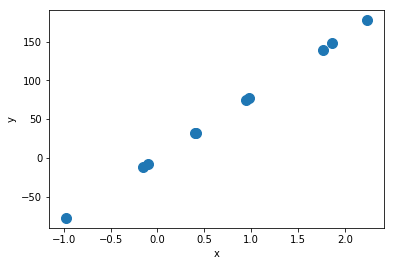

In [8]:
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

- `noise` 증가 --> $\text{Var}[\epsilon]$
- `bias` 증가 --> $y$ 절편 $b$ 증가

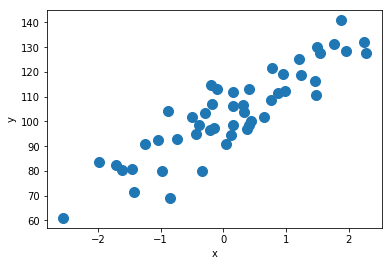

In [9]:
X, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=10,
                          coef=True, random_state=0)
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 연습문제 1
(1) `make_regression`과 같은 기능을 하는 함수 `make_regression2`를 만들어라. 단 `make_regression2`는 `coef=True` 라고 가정한다. 즉 항상 가중치 계수를 반환한다. 또한 1차원 독립 변수만 생성할 수 있으므로 다음과 같은 인수만 가진다.

- `n_samples`
- `bias`
- `noise`
- `random_state`

In [69]:
def make_regression2(n_samples, bias, noise, random_state):
    
    np.random.seed(random_state)
    
    b = bias
    X = np.random.random_sample(n_samples)
    w = np.random.rand()
    e = sp.stats.norm(0, noise).rvs(n_samples)
    y = X*w + e + b
    
    return X, y, w

In [70]:
X, y, w = make_regression2(100, 0, 0, 0)

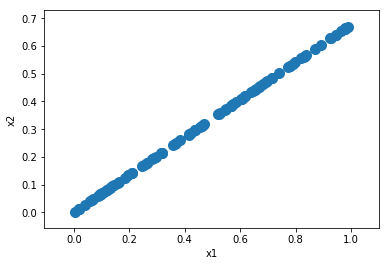

In [73]:
plt.scatter(X, y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

(2) `make_regression2` 함수에 `coef` 인수를 추가하여 `make_regression3` 함수를 만들어라. `make_regression3` 함수는 가중치를 스스로 생성하지 않고 `coef` 인수로 받은 가중치 계수 값을 그대로 사용하며 가중치 계수를 반환하지 않는다.

In [77]:
def make_regression3(n_samples, bias, noise, random_state, coef):
    
    np.random.seed(random_state)
    
    b = bias
    X = np.random.random_sample(n_samples)
    e = sp.stats.norm(0, noise).rvs(n_samples)
    y = X*coef + e + b
    
    return X, y

In [78]:
X, y = make_regression3(100, 0, 0, 0, 1)

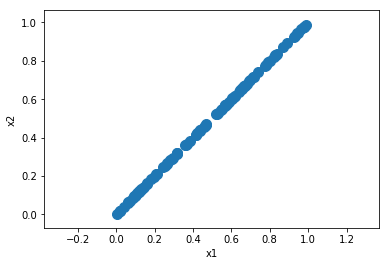

In [79]:
plt.scatter(X, y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

독립변수가 2개인 데이터 `n_feature` = 2

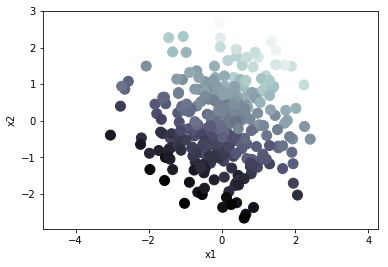

In [81]:
X, y, w = make_regression(n_samples=300, n_features=2, 
                          noise=10, coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

추가적인 인수:
- `n_informative` : 정수 (옵션, 디폴트 10)
    - 독립 변수(feature) 중 실제로 종속 변수와 상관 관계가 있는 독립 변수의 수(차원)
- `effective_rank` : 정수 또는 None (옵션, 디폴트 None)
    - 독립 변수(feature) 중 서로 독립인 독립 변수의 수. 만약 None이면 모두 독립
- `tail_strength` : 0부터 1사이의 실수 (옵션, 디폴트 0.5)
    - effective_rank가 None이 아닌 경우 독립 변수간의 상관관계를 결정하는 변수. 0.5면 독립 변수간의 상관관계가 없다.

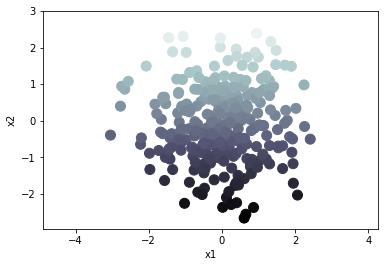

In [82]:
X, y, w = make_regression(n_samples=300, n_features=2, n_informative=1, 
                          noise=0, coef=True, random_state=0)
# n_feature = 두 종류의 독립변수X1, X2
# n_informative = 실제로 종속변수와 상솬 관계가 있는 독립변수의 수(차원)
# 여기에서는 X2가 바뀜에 따라 명암(y)이 바뀌기 때문에, X2가 Y에 영향을 끼치도록
# X1은 영향을 전혀 끼치지 않는다

plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

`tail_strength` 값을 감소시키며, 의도적인 manipulation을 통해 상관관계를 증가시킨다. 

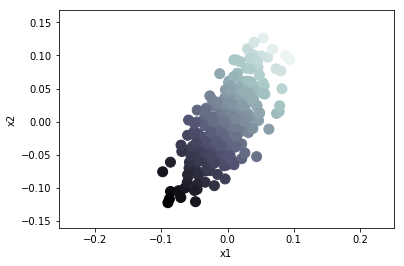

In [84]:
X, y, w = make_regression(n_samples=300, n_features=2, effective_rank=1, noise=0, 
                          tail_strength=0, coef=True, random_state=0)

# 다중공선성 : X1과 X2가 각각 증가하면 둘 다 명암이 밝아진다
# 사실상 둘 중 하나만 있어도 상관이 없는 관계
# tail strength : 주어진 숫자에 따라서 모든 숫자들의 상관관계가 영향을 받는다 

plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

In [7]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import sklearn
from sklearn.datasets import make_regression